In [43]:
#Loading Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns;
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [44]:
#Linear Regression Class
class LinearRegressionModel:
    def ComputeCost(self,X,y,theta):
        m=len(y)
        cost=0
        cost= (1/(2*m))*np.sum(np.power((np.dot(X,theta)-y),2))
        return cost
    
    def GradientDescent(self,X,y,theta,alpha,num_iters,tol=1e-3):
        m=len(y)
        costs=[]
        for i in range(num_iters):
            theta = theta - (alpha/m) * X.T.dot(np.dot(X,theta)-y)
            cost = self.ComputeCost(X,y,theta)
            costs.append(cost)
#            if i%10000 == 0:
#                print ("Cost after iteration %i: %f" %(i, cost))
            if i>1 and (costs[i-1]-costs[i]) < tol:
                print('Algorithm Coverged')
                iters = i
                break
        return costs,theta,iters
    
    def GradientDescent_NoConvergence(self,X,y,theta,alpha,num_iters):
        m=len(y)
        costs=[]
        cost = self.ComputeCost(X,y,theta)
        costs.append(cost)
        for i in range(num_iters):
            theta = theta - (alpha/m) * X.T.dot(np.dot(X,theta)-y)
            cost = self.ComputeCost(X,y,theta)
            costs.append(cost)
#            if i%10000 == 0:
#                print ("Cost after iteration %i: %f" %(i, cost))
        return costs,theta
    
    def featureNormalize(self,X):
        X_norm = X
        mu    = np.zeros((1, X.shape[1]))
        sigma = np.zeros((1, X.shape[1]))
        for i in range(X.shape[1]):
        	mu[:,i] = np.mean(X[:,i])
        	sigma[:,i] = np.std(X[:,i])
        	X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
        return X_norm, mu, sigma
        
    def normalEqn(self,x,y):
        xx = np.dot(x.T,x)
        xy = np.dot(x.T,y)
        xxi = np.linalg.inv(xx)
        b = np.dot(xxi,xy)
        return b
    
    def plotcost(self,costs,text):
        plt.plot(costs,label=text)
        plt.ylabel('Cost')
        plt.xlabel('Iterations')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    
    def TestTrainSplit(self,X,y,tst_sze):
        #Partitioning the dataset into Test Train Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tst_sze,random_state=0)
        #Reshaping Y Column
        y_train=y_train.reshape(-1,1)   
        y_test=y_test.reshape(-1,1)
        m=X_train.shape[0] #Number of training examples
        return X_train,X_test,y_train,y_test,m
    
    def predict(self,X_test,mu,sigma,theta):
        #Testing the result on the Test Set
        #Normalized Xtest Matrix
        Xtest_normal = (X_test - mu)/sigma
        m=X_test.shape[0]
        ones=np.ones((m,1))
        Xtest_normal= np.hstack((ones,Xtest_normal))
        #Predicting Yhat
        y_hat = np.dot(Xtest_normal,theta)
        return y_hat,m
    
    def RMSE(self,y,y_hat,m2):
        #Calculating Root Mean Squared Error
        RMSE = np.sqrt(np.sum(np.power((y-y_hat),2))/m2)
        return RMSE

In [45]:
#Logistic Regression Class
class LogitReg:
    
    def costFunction(self, X, y,theta):
        # Initialize some useful values
        m = len(y)  # number of training examples
        h = self.sigmoid(np.dot(X,theta))    
        a = np.multiply(y , np.log(h))
        b = np.multiply((1 - y) , np.log(1 - h))
        J = -1 *(1./m ) * ((a+b).sum())
        return J
	
    def gradientDescent(self,theta, X, y,alpha,num_iters,tol=1e-5):
        m = len(y)
        costs=[]
        for i in range(num_iters):
            grad = 0
            h = self.sigmoid(np.dot(X,theta))
            grad = (1. / m) * np.dot(X.T,(h - y))
            theta=theta-alpha*grad
            cost = self.costFunction(X,y,theta)
            costs.append(cost)
            if i>1 and (costs[i-1]-costs[i]) < tol:
                print('Algorithm Coverged')
                iters = i
                break
        return costs,theta,iters

    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def predict(self,theta, X,mu,sigma, threshold=0.5):
        X_norm= (X - mu)/sigma
        m=X_norm.shape[0]
        ones=np.ones((m,1))
        newX=np.hstack((ones,X_norm))
        p = self.sigmoid(newX.dot(theta)) >= threshold
        return(p.astype('int'))
    
    def TestTrainSplit(self,X,y,tst_sze):
        #Partitioning the dataset into Test Train Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tst_sze,random_state=0)
        #Reshaping Y Column
        y_train=y_train.reshape(-1,1)   
        y_test=y_test.reshape(-1,1)
        m=X_train.shape[0] #Number of training examples
        return X_train,X_test,y_train,y_test,m
    
    def featureNormalize(self,X):
        X_norm = X
        mu    = np.zeros((1, X.shape[1]))
        sigma = np.zeros((1, X.shape[1]))
        for i in range(X.shape[1]):
        	mu[:,i] = np.mean(X[:,i])
        	sigma[:,i] = np.std(X[:,i])
        	X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
        return X_norm, mu, sigma
    
    def Accuracy(self,y,y_hat):
        m = len(y)
        corrects = 0
        for i in range(0, m):
            if y[i] == y_hat[i]:
                corrects += 1
        return (100 * corrects) / m

In [46]:
#Setting up the directory Path
os.chdir('C:/Users/sudha/Box Sync/Fall 19/ML')
#Loading Dataset
df=pd.read_csv("energydata_complete.csv",sep=',')
#printing the head of the Dataset
df=df.drop(['date'], axis=1)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [47]:
#Exploratory Data Analysis
#Listing Column in the dataset
df.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [48]:
#Finding for any missing values in the Datset
df.isnull().values.any()

False

In [49]:
#There are no missing values in the Dataset
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [50]:
#Number of observations in the Dataset
len(df)

19735

In [51]:
#Function to generate Correlation HeatMap
def heatMap(df, mirror):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=False, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot
    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        # Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=False, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
    # show plot
    plt.show()

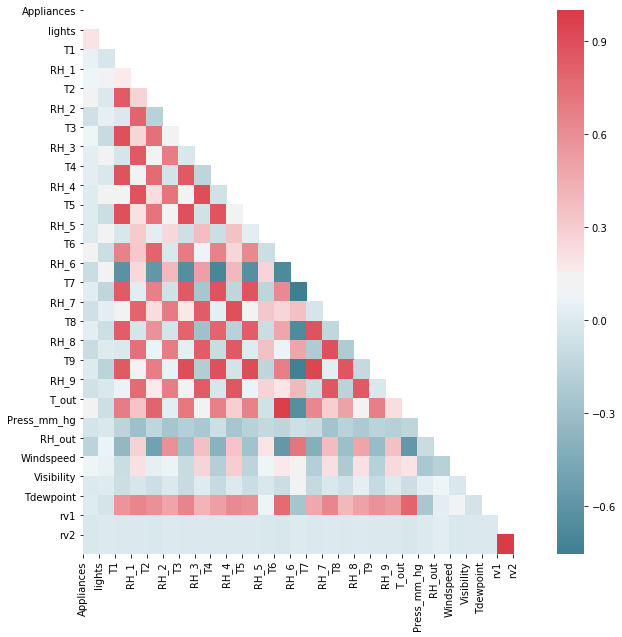

In [52]:
hmap = heatMap(df,mirror='True')

In [53]:
#Creating a Class Instance for Linear Regression
lm=LinearRegressionModel()
#Selecting Random 15 Features from the Dataset
y=df['Appliances'].values
X=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7']].values
#Splitting Test Train Split
X_train,X_test,y_train,y_test,m = lm.TestTrainSplit(X,y,tst_sze=0.2)
#Normalizing Features
X_norm, mu, sigma = lm.featureNormalize(X_train)
#Horizontal Stacking of intercept to the feature Matrix
ones=np.ones((m,1))
newX=np.hstack((ones,X_norm))
#Initializing theta values to Zeros
var= X_train.shape[1] + 1

In [54]:
#Experiment 1
#Linear Regression
learning_rates = [0.1,0.05,0.01,0.005,0.001,0.0005]
num_iters=500000
RMSE_trains=[]
RMSE_tests=[]
iters_s=[]
costs_s=[]
for i in range(len(learning_rates)):
    theta=np.zeros((var,1))
    costs,theta,iters = lm.GradientDescent(newX,y_train,theta,learning_rates[i],num_iters)
    y_hat_train = np.dot(newX,theta)
    RMSE_train=lm.RMSE(y_train,y_hat_train,m)
    y_hat_test,m2 = lm.predict(X_test,mu,sigma,theta)
    RMSE_test=lm.RMSE(y_test,y_hat_test,m2)
    RMSE_trains.append(RMSE_train)
    RMSE_tests.append(RMSE_test)
    iters_s.append(iters)
    costs_s.append(costs[-1])

Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged


In [55]:
exp1_lm= pd.DataFrame(
        {'Learning Rate': learning_rates,
         'Cost'         : costs_s,
         'Iterations'   : iters_s,
         'Train RMSE'   : RMSE_trains,
         'Test RMSE'    : RMSE_tests
                })
exp1_lm

,Learning Rate,Cost,Iterations,Train RMSE,Test RMSE
0,0.1000,4382.102350,1489,93.617331,99.326507
1,0.0500,4382.386870,2585,93.620370,99.334039
2,0.0100,4384.656597,8362,93.644611,99.376386
3,0.0050,4387.470375,12820,93.674654,99.418631
4,0.0010,4404.050942,27659,93.851488,99.612131
5,0.0005,4415.623708,38901,93.974717,99.722800


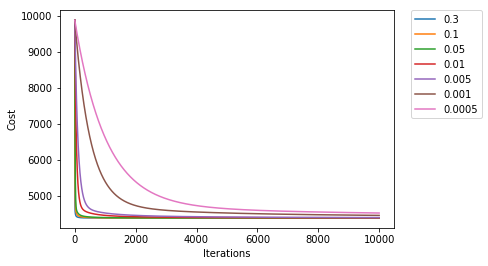

In [56]:
learning_rates = [0.3,0.1,0.05,0.01,0.005,0.001,0.0005]
num_iters=10000
for i in range(len(learning_rates)):
    theta=np.zeros((var,1))
    costs,theta= lm.GradientDescent_NoConvergence(newX,y_train,theta,learning_rates[i],num_iters)
    lm.plotcost(costs,text=learning_rates[i])

In [57]:
# Linear Regression Theta
theta

array([[ 96.62933778],
       [ 20.462787  ],
       [ -2.53449255],
       [ 20.28338172],
       [  6.30704126],
       [-10.79683893],
       [ 15.51998448],
       [  8.39328297],
       [-10.45552005],
       [ -3.21671274],
       [ -8.10099943],
       [  0.45620836],
       [  8.21446924],
       [ -5.72556185],
       [ -3.08774831],
       [-19.65307165]])

In [58]:
#Experiment 1
#Logistic Regression
#Creating a Class Instance
logit=LogitReg()
#Selecting Random 15 Features from the Dataset
y_lo=df['Appliances'].values
X_lo=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7']].values
      
#Converting to Binary Classification Problem
y_lo=(df['Appliances']>int(y_lo.mean())).astype(int).values
y_lo.mean()
#Splitting Test Train Split
X_train_lo,X_test_lo,y_train_lo,y_test_lo,m_lo = logit.TestTrainSplit(X_lo,y_lo,tst_sze=0.2)

var_lo= X_train_lo.shape[1] + 1
theta_lo=np.zeros((var_lo,1))
X_norm_lo, mu_lo, sigma_lo = logit.featureNormalize(X_train_lo)

#Horizontal Stacking of intercept to the feature Matrix
ones_lo=np.ones((m_lo,1))
newX_lo=np.hstack((ones_lo,X_norm_lo))

In [59]:
learning_rates = [0.5,0.1,0.05,0.01,0.005,0.001,0.0005]
num_iters=500000
train_acc_s=[]
test_acc_s=[]
iters_s=[]
costs_s=[]
for i in range(len(learning_rates)):
    theta_lo=np.zeros((var_lo,1))
    costs,theta,iters = logit.gradientDescent(theta_lo, newX_lo, y_train_lo,learning_rates[i],num_iters)
    y_hat_train_lo = logit.predict(theta, X_train_lo,mu_lo,sigma_lo)
    train_acc=logit.Accuracy(y_train_lo,y_hat_train_lo)
    y_hat_test_lo = logit.predict(theta, X_test_lo,mu_lo,sigma_lo)
    test_acc=logit.Accuracy(y_test_lo,y_hat_test_lo)
    train_acc_s.append(train_acc)
    test_acc_s.append(test_acc)
    iters_s.append(iters)
    costs_s.append(costs[-1])

Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged


In [60]:
exp1_lo= pd.DataFrame(
        {'Learning Rate': learning_rates,
         'Cost'         : costs_s,
         'Iterations'   : iters_s,
         'Train Accuracy'   : train_acc_s,
         'Test Accuracy'    : test_acc_s
                })
exp1_lo

,Learning Rate,Cost,Iterations,Train Accuracy,Test Accuracy
0,0.5000,0.467126,375,73.587535,78.008614
1,0.1000,0.471902,725,73.587535,77.324550
2,0.0500,0.474860,1033,73.587535,76.969851
3,0.0100,0.489273,2028,73.587535,75.728401
4,0.0050,0.499656,2571,73.587535,75.475044
5,0.0010,0.534134,5028,73.587535,74.638966
6,0.0005,0.562220,6117,73.587535,74.436281


In [61]:
#Logistic Regression Theta
theta

array([[-0.50939053],
       [ 0.23745567],
       [ 0.04164471],
       [ 0.10709642],
       [ 0.09741077],
       [-0.06527807],
       [ 0.03464631],
       [ 0.02147831],
       [-0.02274775],
       [-0.0008149 ],
       [-0.02047081],
       [ 0.05165588],
       [ 0.08743882],
       [-0.07857204],
       [-0.01936023],
       [-0.121622  ]])

In [63]:
#Experiment 2
#Linear Regression
learning_rates = [0.1,0.05,0.01]
convergences=[1e-1,1e-2,1e-3,1e-4,1e-5]
num_iters=500000
RMSE_trains=[]
RMSE_tests=[]
iters_s=[]
costs_s=[]
tol_s=[]
learning_rates_s=[]
for j in range(len(learning_rates)):
    for i in range(len(convergences)):
        theta=np.zeros((var,1))
        costs,theta,iters = lm.GradientDescent(newX,y_train,theta,learning_rates[j],num_iters,tol=convergences[i])
        y_hat_train = np.dot(newX,theta)
        RMSE_train=lm.RMSE(y_train,y_hat_train,m)
        y_hat_test,m2 = lm.predict(X_test,mu,sigma,theta)
        RMSE_test=lm.RMSE(y_test,y_hat_test,m2)
        RMSE_trains.append(RMSE_train)
        RMSE_tests.append(RMSE_test)
        iters_s.append(iters)
        costs_s.append(costs[-1])
        learning_rates_s.append(learning_rates[j])
        tol_s.append(convergences[i])

Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged


In [64]:
exp2_lm=pd.DataFrame(
        {'Learning Rate'         : learning_rates_s,
         'Convergence Threshold' : tol_s,
         'Cost'                  : costs_s,
         'Iterations'            : iters_s,
         'Train RMSE'            : RMSE_trains,
         'Test RMSE'             : RMSE_tests
                })
exp2_lm

,Learning Rate,Convergence Threshold,Cost,Iterations,Train RMSE,Test RMSE
0,0.10,0.10000,4403.964024,276,93.850562,99.611444
1,0.10,0.01000,4384.642982,836,93.644466,99.376171
2,0.10,0.00100,4382.102350,1489,93.617331,99.326507
3,0.10,0.00010,4381.847663,2143,93.614611,99.316292
4,0.10,0.00001,4381.822230,2796,93.614339,99.313631
5,0.05,0.10000,4415.476684,389,93.973152,99.721508
6,0.05,0.01000,4387.456207,1282,93.674502,99.418440
7,0.05,0.00100,4382.386870,2585,93.620370,99.334039
8,0.05,0.00010,4381.876144,3893,93.614915,99.318050
9,0.05,0.00001,4381.825071,5201,93.614369,99.314121


In [65]:
#Experiment 3
#15 Randomly selected Features
learning_rates = [0.1,0.05,0.01,0.005,0.001,0.0005]
num_iters=500000
RMSE_trains=[]
RMSE_tests=[]
iters_s=[]
costs_s=[]
for i in range(len(learning_rates)):
    theta=np.zeros((var,1))
    costs,theta,iters = lm.GradientDescent(newX,y_train,theta,learning_rates[i],num_iters)
    y_hat_train = np.dot(newX,theta)
    RMSE_train=lm.RMSE(y_train,y_hat_train,m)
    y_hat_test,m2 = lm.predict(X_test,mu,sigma,theta)
    RMSE_test=lm.RMSE(y_test,y_hat_test,m2)
    RMSE_trains.append(RMSE_train)
    RMSE_tests.append(RMSE_test)
    iters_s.append(iters)
    costs_s.append(costs[-1])

Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged
Algorithm Coverged


In [66]:
exp3_15 = pd.DataFrame(
        {'Learning Rate': learning_rates,
         'Cost'         : costs_s,
         'Iterations'   : iters_s,
         'Train RMSE'   : RMSE_trains,
         'Test RMSE'    : RMSE_tests
                })
exp3_15

,Learning Rate,Cost,Iterations,Train RMSE,Test RMSE
0,0.1000,4382.102350,1489,93.617331,99.326507
1,0.0500,4382.386870,2585,93.620370,99.334039
2,0.0100,4384.656597,8362,93.644611,99.376386
3,0.0050,4387.470375,12820,93.674654,99.418631
4,0.0010,4404.050942,27659,93.851488,99.612131
5,0.0005,4415.623708,38901,93.974717,99.722800


In [67]:
#Selecting Random 10 Features from the Dataset
y_10=df['Appliances'].values
X_10=df[['T1', 'RH_1', 'T2', 'RH_4', 'T5', 'T7', 'Windspeed', 'Visibility','Tdewpoint', 'rv1']].values

#Splitting Test Train Split
X_train_10,X_test_10,y_train_10,y_test_10,m_10 = lm.TestTrainSplit(X_10,y_10,tst_sze=0.2)
#Normalizing Features
X_norm_10, mu_10, sigma_10 = lm.featureNormalize(X_train_10)
#Horizontal Stacking of intercept to the feature Matrix
ones_10=np.ones((m_10,1))
newX_10=np.hstack((ones_10,X_norm_10))
#Initializing theta values to Zeros
var_10= X_train_10.shape[1] + 1

In [68]:
learning_rates_10 = [0.1,0.05,0.01]
num_iters_10=500000
RMSE_trains_10=[]
RMSE_tests_10=[]
iters_s_10=[]
costs_s_10=[]
for i in range(len(learning_rates_10)):
    theta_10=np.zeros((var_10,1))
    costs_10,theta_10,iters_10 = lm.GradientDescent(newX_10,y_train_10,theta_10,learning_rates_10[i],num_iters_10)
    y_hat_train_10 = np.dot(newX_10,theta_10)
    RMSE_train_10=lm.RMSE(y_train_10,y_hat_train_10,m_10)
    y_hat_test_10,m2_10 = lm.predict(X_test_10,mu_10,sigma_10,theta_10)
    RMSE_test_10=lm.RMSE(y_test_10,y_hat_test_10,m2_10)
    RMSE_trains_10.append(RMSE_train_10)
    RMSE_tests_10.append(RMSE_test_10)
    iters_s_10.append(iters_10)
    costs_s_10.append(costs_10[-1])

Algorithm Coverged
Algorithm Coverged
Algorithm Coverged


In [69]:
exp3_10 =pd.DataFrame(
        {'Learning Rate': learning_rates_10,
         'Cost'         : costs_s_10,
         'Iterations'   : iters_s_10,
         'Train RMSE'   : RMSE_trains_10,
         'Test RMSE'    : RMSE_tests_10
                })
exp3_10

,Learning Rate,Cost,Iterations,Train RMSE,Test RMSE
0,0.10,4834.904951,459,98.335192,103.329286
1,0.05,4834.971656,827,98.335870,103.330025
2,0.01,4835.490650,3091,98.341148,103.337312


In [72]:
theta_10

array([[ 97.28401317],
       [  4.72652163],
       [ 37.62864843],
       [ 23.39688485],
       [-33.33966641],
       [-12.23418944],
       [ -5.15136111],
       [  8.70284266],
       [  1.01332672],
       [ -9.61083663],
       [ -0.94869112]])

In [70]:
#Experiment 4
    
#Feature Selection using Random Forest
y_full=df['Appliances'].values
X_temp=df.drop(['Appliances'], axis=1)
X_full=X_temp.values

#Partitioning the dataset into Test Train Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_full,y_full, test_size=0.2,random_state=0)

# Selecting 15 Important Features using Random Forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [71]:
#Filtering of top 10 Features
column_names = df.drop(['Appliances'], axis=1).columns.values
Imp_df = pd.DataFrame(
    {'ColumnName': column_names,
     'Importance': clf.feature_importances_
    })
Imp_sort=Imp_df.sort_values(by='Importance', ascending=False)
top10_Features=list(Imp_sort['ColumnName'].head(10))
#Top 10 Important Features
top10_Features

['RH_8',
 'rv2',
 'rv1',
 'RH_5',
 'RH_9',
 'T6',
 'RH_out',
 'Tdewpoint',
 'Press_mm_hg',
 'RH_6']

In [73]:
#Selecting Top 15 Features from the Dataset
y_top=df['Appliances'].values
X_top=df[top10_Features].values

#Test Train Split
X_train_top,X_test_top,y_train_top,y_test_top,m_top = lm.TestTrainSplit(X_top,y_top,tst_sze=0.2)

#Normalizing Features
X_norm_top, mu_top, sigma_top = lm.featureNormalize(X_train_top)

#Horizontal Stacking of intercept to the feature Matrix
ones_top=np.ones((m_top,1))
newX_top=np.hstack((ones,X_norm_top))

#Initializing theta values to Zeros
var_top= X_train_top.shape[1] + 1
theta_top=np.zeros((var_top,1))

In [75]:
df[top10_Features].head()

,RH_8,rv2,rv1,RH_5,RH_9,T6,RH_out,Tdewpoint,Press_mm_hg,RH_6
0,48.900000,13.275433,13.275433,55.20,45.53,7.026667,92.0,5.3,733.5,84.256667
1,48.863333,18.606195,18.606195,55.20,45.56,6.833333,92.0,5.2,733.6,84.063333
2,48.730000,28.642668,28.642668,55.09,45.50,6.560000,92.0,5.1,733.7,83.156667
3,48.590000,45.410389,45.410389,55.09,45.40,6.433333,92.0,5.0,733.8,83.423333
4,48.590000,10.084097,10.084097,55.09,45.40,6.366667,92.0,4.9,733.9,84.893333


In [76]:
learning_rates_top = [0.1,0.05,0.01]
num_iters_top=500000
RMSE_trains_top=[]
RMSE_tests_top=[]
iters_s_top=[]
costs_s_top=[]
for i in range(len(learning_rates_top)):
    theta_top=np.zeros((var_top,1))
    costs_top,theta_top,iters_top = lm.GradientDescent(newX_top,y_train_top,theta_top,learning_rates_top[i],num_iters_top)
    y_hat_train_top = np.dot(newX_top,theta_top)
    RMSE_train_top=lm.RMSE(y_train_top,y_hat_train_top,m_top)
    y_hat_test_top,m2_top = lm.predict(X_test_top,mu_top,sigma_top,theta_top)
    RMSE_test_top=lm.RMSE(y_test_top,y_hat_test_top,m2_top)
    RMSE_trains_top.append(RMSE_train_top)
    RMSE_tests_top.append(RMSE_test_top)
    iters_s_top.append(iters_top)
    costs_s_top.append(costs_top[-1])

Algorithm Coverged
Algorithm Coverged
Algorithm Coverged


In [77]:
exp4_10 =pd.DataFrame(
        {'Learning Rate': learning_rates_top,
         'Cost'         : costs_s_top,
         'Iterations'   : iters_s_top,
         'Train RMSE'   : RMSE_trains_top,
         'Test RMSE'    : RMSE_tests_top
                })
exp4_10

,Learning Rate,Cost,Iterations,Train RMSE,Test RMSE
0,0.10,4919.860754,687,99.195370,104.449000
1,0.05,4920.038002,1129,99.197157,104.453011
2,0.01,4921.362329,2921,99.210507,104.470245


In [78]:
theta_top

array([[ 97.28401317],
       [-21.09371963],
       [ -0.33859832],
       [ -0.33859832],
       [  5.26852103],
       [  3.08730406],
       [ 23.5280217 ],
       [ -8.68577574],
       [ -2.8150045 ],
       [ -3.09574899],
       [ 20.35441249]])